<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Автор материала: Екатерина Демидова, Data Scientist @ Segmento <br>


Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [4]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs).

In [141]:
df = pd.read_csv('../../data/howpop_train.csv')

In [142]:
df.shape

(134137, 17)

In [143]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [144]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [146]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/178005/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [147]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [148]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [149]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [150]:
groups = df.groupby(['year', 'month'])
gaps = [(2015, 3), (2015, 4), (2016, 3), (2016, 4)]
gaps = pd.concat( [ groups.get_group(name) for name, group in groups if name in gaps ] )
# gaps.describe()
gaps
# kek = [ groups.get_group(name) for name, group in groups if name in gaps ]
# kek

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0
97668,https://habrahabr.ru/post/286286/,habrahabr.ru,286286,2015-03-01 07:13:00,@semen_grinshtein,misc,False,1883,"9 марта компания Apple сделает то, что не дела...",12,3,9300,16.0,4.0,2015,3,7,7
97669,https://habrahabr.ru/post/251347/,habrahabr.ru,251347,2015-03-01 07:52:00,@Makeman,develop,False,48658,Context Model Pattern via Aero Framework,6,66,6600,8.0,4.0,2015,3,7,7
97670,https://habrahabr.ru/post/251765/,habrahabr.ru,251765,2015-03-01 10:30:00,@Doomer3D,develop,False,40374,Заполнение текстовых шаблонов данными на основ...,4,39,6200,5.0,1.0,2015,3,7,10
97671,https://habrahabr.ru/post/251793/,habrahabr.ru,251793,2015-03-01 12:04:00,@4p4,develop,False,12410,Философия программирования 5 — Колибри и Реактос,68,155,33100,85.0,20.0,2015,3,7,12
97672,https://habrahabr.ru/post/251747/,habrahabr.ru,251747,2015-03-01 12:26:00,@PavelVelikhov,develop,False,23204,Сделай сам: MSc Computer Science на уровне топ...,63,880,87500,81.0,5.0,2015,3,7,12
97673,https://geektimes.ru/company/soundpal/blog/246...,geektimes.ru,246570,2015-03-01 12:45:00,NaN,NaN,True,3992,Sony выпустила специальные карты памяти для чи...,14,8,7300,10.0,9.0,2015,3,7,12
97674,https://geektimes.ru/post/246572/,geektimes.ru,246572,2015-03-01 13:37:00,@marks,NaN,False,2756,«Хоровод» — первое упоминание трех законов роб...,35,17,12900,14.0,1.0,2015,3,7,13
97675,https://habrahabr.ru/post/251797/,habrahabr.ru,251797,2015-03-01 13:55:00,@PerlPower,develop,False,9110,Статичный хостинг: жизнь после смерти narod.ru,50,334,51100,57.0,8.0,2015,3,7,13


In [151]:
gaps['gap'] = gaps.apply(lambda x: '(' + str(x['year']) + ', ' + str(x['month']) + ')', axis=1)
gaps.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,gap
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0,"(2015, 3)"
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0,"(2015, 3)"
97668,https://habrahabr.ru/post/286286/,habrahabr.ru,286286,2015-03-01 07:13:00,@semen_grinshtein,misc,False,1883,"9 марта компания Apple сделает то, что не дела...",12,3,9300,16.0,4.0,2015,3,7,7,"(2015, 3)"
97669,https://habrahabr.ru/post/251347/,habrahabr.ru,251347,2015-03-01 07:52:00,@Makeman,develop,False,48658,Context Model Pattern via Aero Framework,6,66,6600,8.0,4.0,2015,3,7,7,"(2015, 3)"
97670,https://habrahabr.ru/post/251765/,habrahabr.ru,251765,2015-03-01 10:30:00,@Doomer3D,develop,False,40374,Заполнение текстовых шаблонов данными на основ...,4,39,6200,5.0,1.0,2015,3,7,10,"(2015, 3)"


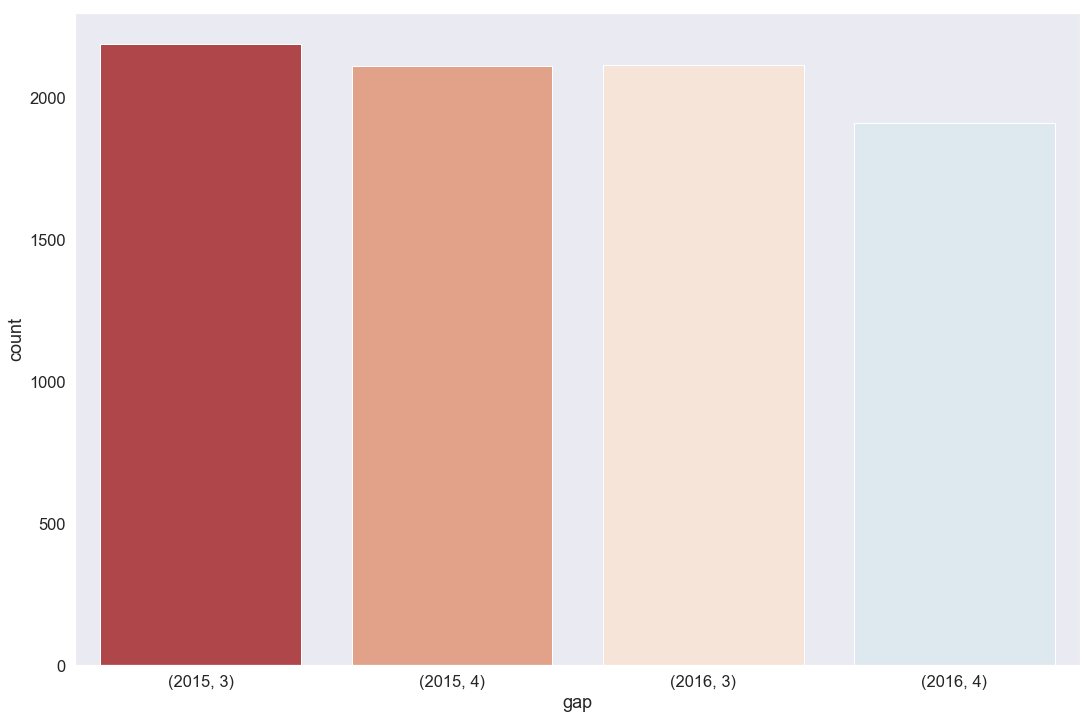

In [152]:
sns.countplot(x='gap', data=gaps)
# 2015 - march

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

In [153]:
big_month = gaps[gaps['gap'] == '(2015, 3)']
big_month.shape

(2189, 19)

In [154]:
big_month['day_of_month'] = big_month.apply(lambda x: int(str(x['published']).split('-')[2][0:2]), axis=1)
big_month.head()

/Users/amerlon-/.brew/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,gap,day_of_month
97666,https://habrahabr.ru/post/251783/,habrahabr.ru,251783,2015-03-01 00:00:00,@SLY_G,develop,False,49647,Введение в разработку слайд-шоу на JavaScript,6,375,42900,15.0,4.0,2015,3,7,0,"(2015, 3)",1
97667,https://habrahabr.ru/company/kolibrios/blog/23...,habrahabr.ru,239033,2015-03-01 00:09:00,NaN,develop,False,8581,Дайджест KolibriOS #7: как мы зиму перезимовали,14,22,17600,36.0,2.0,2015,3,7,0,"(2015, 3)",1
97668,https://habrahabr.ru/post/286286/,habrahabr.ru,286286,2015-03-01 07:13:00,@semen_grinshtein,misc,False,1883,"9 марта компания Apple сделает то, что не дела...",12,3,9300,16.0,4.0,2015,3,7,7,"(2015, 3)",1
97669,https://habrahabr.ru/post/251347/,habrahabr.ru,251347,2015-03-01 07:52:00,@Makeman,develop,False,48658,Context Model Pattern via Aero Framework,6,66,6600,8.0,4.0,2015,3,7,7,"(2015, 3)",1
97670,https://habrahabr.ru/post/251765/,habrahabr.ru,251765,2015-03-01 10:30:00,@Doomer3D,develop,False,40374,Заполнение текстовых шаблонов данными на основ...,4,39,6200,5.0,1.0,2015,3,7,10,"(2015, 3)",1


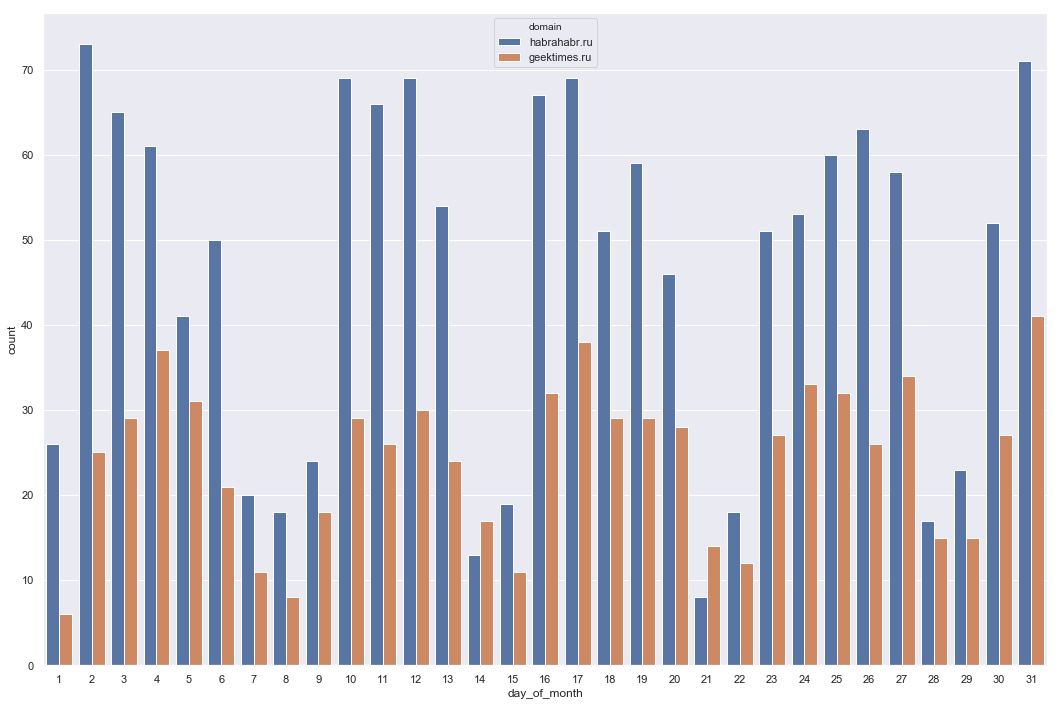

In [155]:
sns.set(rc={'figure.figsize':(18, 12)})
sns.countplot(x='day_of_month', hue='domain', data=big_month)

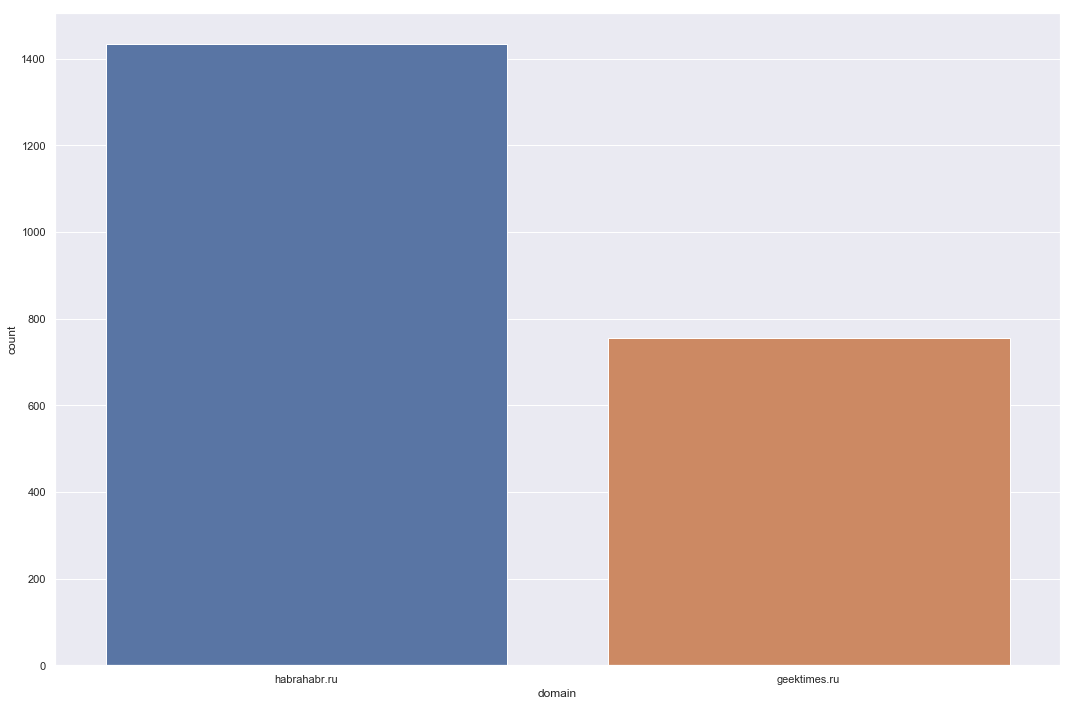

In [156]:
sns.countplot(x='domain', data=big_month)

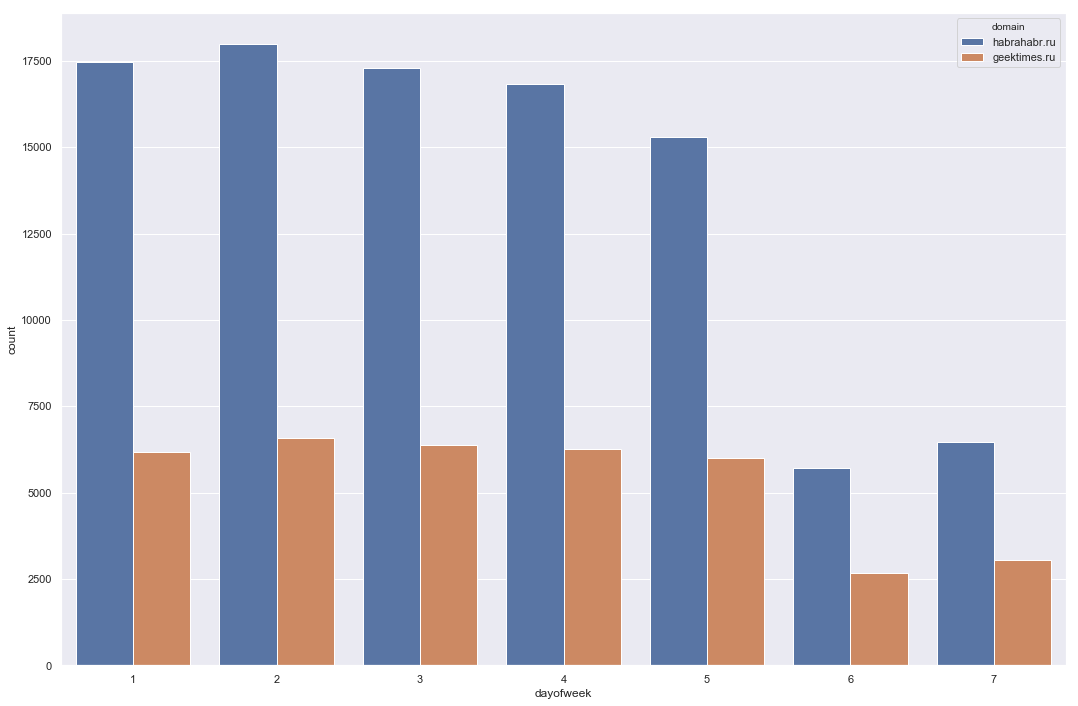

In [157]:
sns.countplot(x='dayofweek', hue='domain', data=df)

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

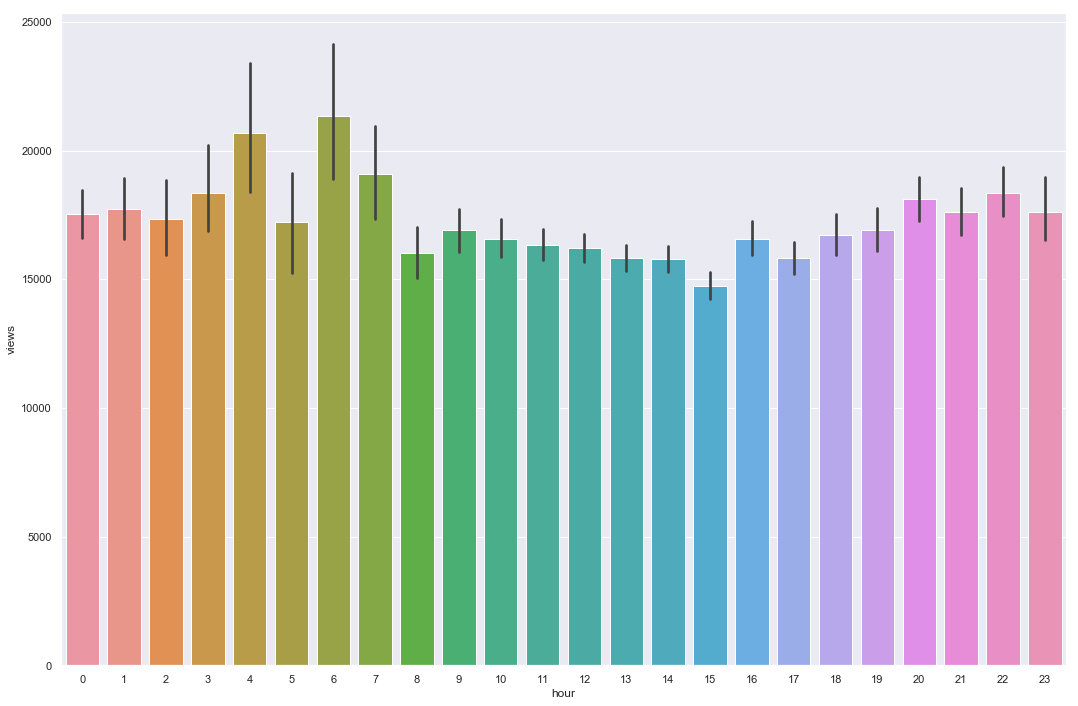

In [158]:
df['hour'] = df.apply(lambda x: int(x['hour']), axis=1)
sns.barplot(x='hour', y='views', data=df)

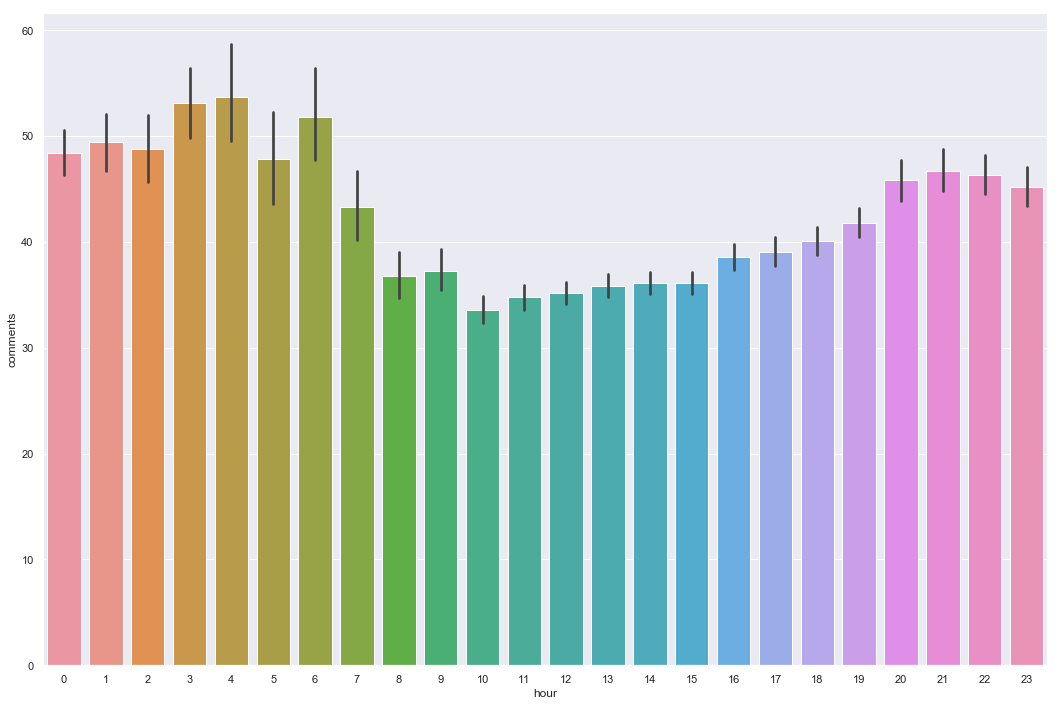

In [159]:
sns.barplot(x='hour', y='comments', data=df)

In [160]:
df.loc[df['comments'].idxmax()]

url            https://geektimes.ru/post/123157/
domain                              geektimes.ru
post_id                                   123157
published                    2011-07-01 02:35:00
author                                  @Dottore
flow                                         NaN
polling                                    False
content_len                                 2158
title           Как раздавать инвайты на Google+
comments                                    2266
favs                                          24
views                                      15300
votes_plus                                   226
votes_minus                                   55
year                                        2011
month                                          7
dayofweek                                      5
hour                                           2
Name: 38763, dtype: object

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

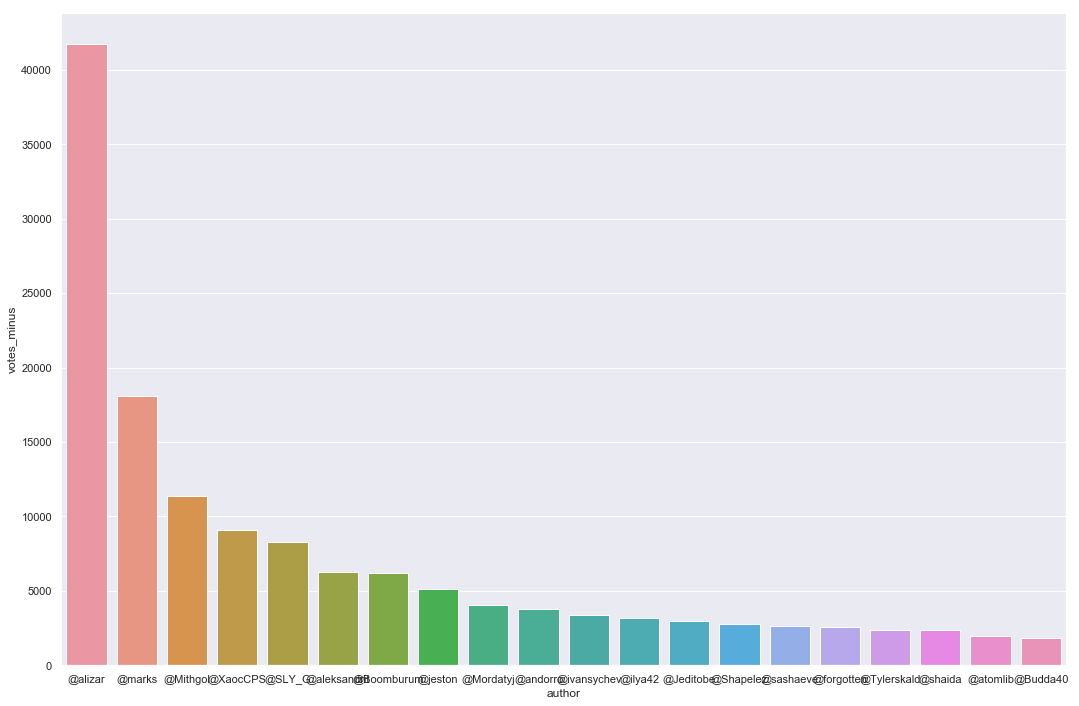

In [161]:
# df['author'].value_counts().iloc[:20]
sns.barplot(x=df.groupby(['author'])['votes_minus'].sum().sort_values(ascending=False).head(20).index,
            y=df.groupby(['author'])['votes_minus'].sum().sort_values(ascending=False).head(20))
# df['author']
# sns.barplot(x='author', y='votes_minus', data=df, order=df['author'].value_counts().iloc[:100].index)

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

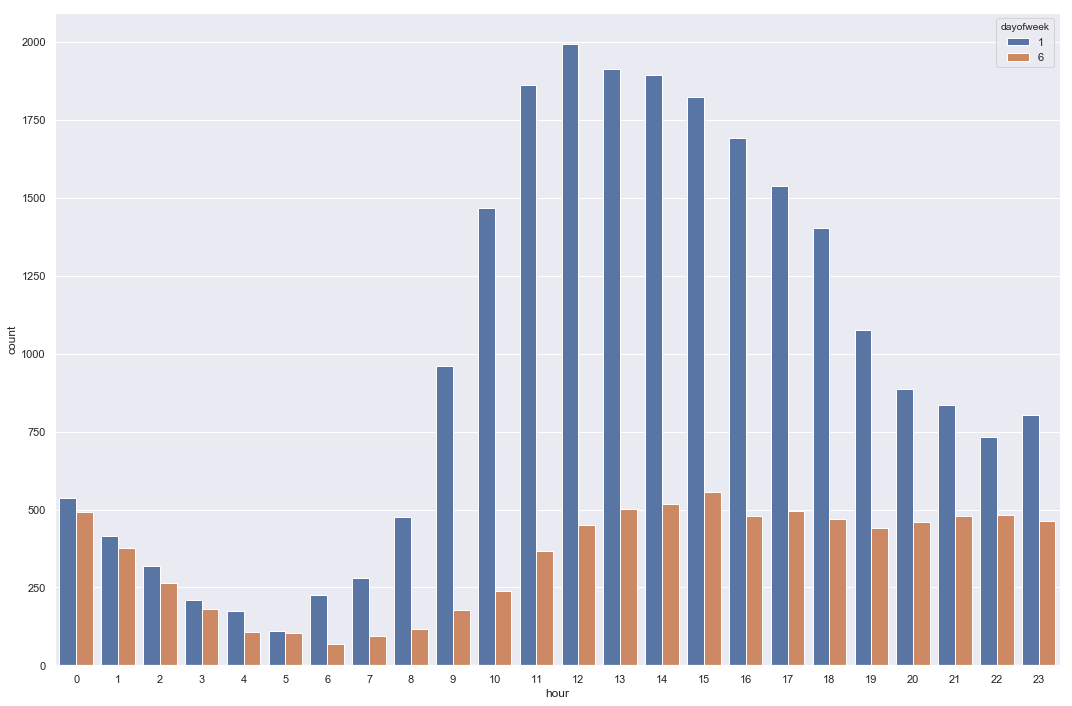

In [163]:
sns.countplot(x='hour', hue='dayofweek', data=df[(df['dayofweek'] ==  6) | (df['dayofweek'] ==  1)])